In [9]:
#import libraries
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)

import seaborn as sns
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats
import statsmodels.api as sm
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("/Users/rohitkumar/Applications/dplr.csv", parse_dates=["TIME"],index_col="TIME")
print(df.head())

                     STATION.ID         LAST.UPDATED           NAME  \
TIME                                                                  
2019-01-01 00:00:00           1  2018-12-31 23:50:05  CLARENDON ROW   
2019-01-01 01:00:00           1  2019-01-01 00:53:10  CLARENDON ROW   
2019-01-01 02:00:00           1  2019-01-01 01:54:04  CLARENDON ROW   
2019-01-01 03:00:00           1  2019-01-01 02:55:38  CLARENDON ROW   
2019-01-01 04:00:00           1  2019-01-01 03:56:32  CLARENDON ROW   

                     BIKE.STANDS  AVAILABLE.BIKE.STANDS  AVAILABLE.BIKES  \
TIME                                                                       
2019-01-01 00:00:00           31                     30                1   
2019-01-01 01:00:00           31                     30                1   
2019-01-01 02:00:00           31                     30                1   
2019-01-01 03:00:00           31                     30                1   
2019-01-01 04:00:00           31              

In [11]:
df.columns = [col.replace(".","_") for col in df]
df.head()

,STATION_ID,LAST_UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,2018-12-31 23:50:05,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 01:00:00,1,2019-01-01 00:53:10,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 02:00:00,1,2019-01-01 01:54:04,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,8.0,2.0,240.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 03:00:00,1,2019-01-01 02:55:38,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,8.0,2.0,250.0,2.0,11.0,0.0,30000.0,30.0,6.0
2019-01-01 04:00:00,1,2019-01-01 03:56:32,CLARENDON ROW,31,30,1,Open,Clarendon Row,53.340927,-6.262501,...,2.0,10.0,2.0,250.0,2.0,11.0,0.0,30000.0,24.0,6.0


In [12]:
df1=df[df.columns[~df.columns.isin(['LAST_UPDATED','NAME','STATUS','ADDRESS','LATITUDE','LONGITUDE'])]]

In [13]:
df1["2019-01-01"]

,STATION_ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ind,rain,ind_1,temp,ind_2,wetb,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,1,31,30,1,0.0,0.0,0.0,8.8,0.0,7.3,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 01:00:00,1,31,30,1,0.0,0.0,0.0,8.3,0.0,7.0,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 02:00:00,1,31,30,1,0.0,0.0,0.0,8.4,0.0,7.1,...,2.0,8.0,2.0,240.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 03:00:00,1,31,30,1,0.0,0.0,0.0,8.6,0.0,7.3,...,2.0,8.0,2.0,250.0,2.0,11.0,0.0,30000.0,30.0,6.0
2019-01-01 04:00:00,1,31,30,1,0.0,0.0,0.0,8.4,0.0,7.3,...,2.0,10.0,2.0,250.0,2.0,11.0,0.0,30000.0,24.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 19:00:00,115,30,24,6,0.0,0.0,0.0,5.6,0.0,4.6,...,2.0,5.0,2.0,20.0,2.0,11.0,0.0,18000.0,27.0,8.0
2019-01-01 20:00:00,115,30,21,9,0.0,0.0,0.0,4.6,0.0,3.7,...,2.0,5.0,2.0,360.0,2.0,11.0,0.0,18000.0,27.0,8.0
2019-01-01 21:00:00,115,30,23,7,0.0,0.0,0.0,3.3,0.0,2.4,...,2.0,5.0,2.0,10.0,2.0,11.0,0.0,18000.0,28.0,5.0


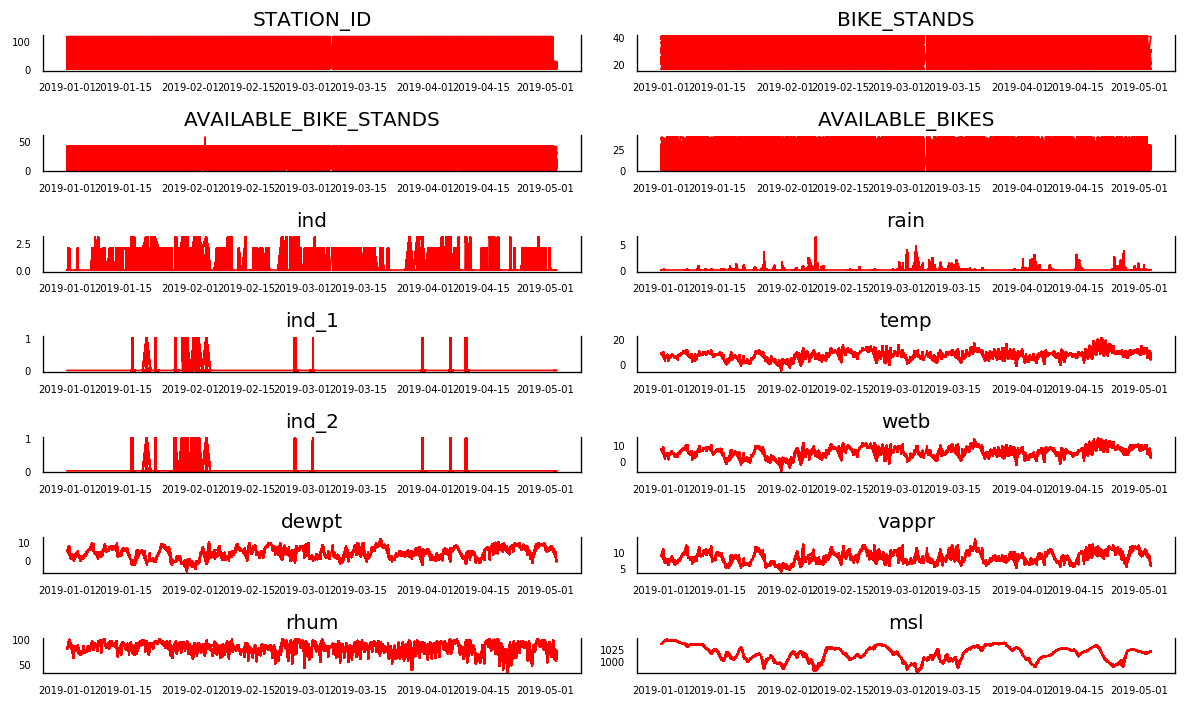

In [14]:
# Plot of all the variables present in the dataFrame

fig, axes = plt.subplots(nrows=7, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df1[df1.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df1.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [15]:
#df3=df1["2019-01-01":"2019-03-15"]
df3 = df1[df1['STATION_ID']==3]

df3

,STATION_ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ind,rain,ind_1,temp,ind_2,wetb,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3,20,13,7,0.0,0.0,0.0,8.8,0.0,7.3,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 01:00:00,3,20,13,7,0.0,0.0,0.0,8.3,0.0,7.0,...,2.0,9.0,2.0,250.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 02:00:00,3,20,13,7,0.0,0.0,0.0,8.4,0.0,7.1,...,2.0,8.0,2.0,240.0,2.0,11.0,0.0,30000.0,999.0,3.0
2019-01-01 03:00:00,3,20,13,7,0.0,0.0,0.0,8.6,0.0,7.3,...,2.0,8.0,2.0,250.0,2.0,11.0,0.0,30000.0,30.0,6.0
2019-01-01 04:00:00,3,20,13,7,0.0,0.0,0.0,8.4,0.0,7.3,...,2.0,10.0,2.0,250.0,2.0,11.0,0.0,30000.0,24.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-03 18:00:00,3,20,17,3,0.0,0.0,0.0,9.0,0.0,5.7,...,2.0,11.0,2.0,10.0,2.0,11.0,0.1,40000.0,40.0,7.0
2019-05-03 19:00:00,3,20,19,1,0.0,0.0,0.0,7.7,0.0,4.9,...,2.0,12.0,2.0,350.0,2.0,11.0,0.4,40000.0,999.0,3.0
2019-05-03 20:00:00,3,20,17,3,0.0,0.0,0.0,6.7,0.0,4.1,...,2.0,11.0,2.0,350.0,2.0,11.0,0.0,40000.0,110.0,5.0


In [16]:
df3 = df3.resample('D').mean()
df3

,STATION_ID,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,ind,rain,ind_1,temp,ind_2,wetb,...,ind_3,wdsp,ind_4,wddir,ww,w,sun,vis,clht,clamt
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3.0,20.0,12.208333,7.791667,0.416667,0.008333,0.0,7.266667,0.0,6.433333,...,2.0,7.750000,2.0,187.916667,14.541667,27.916667,0.004167,19000.000000,141.875000,6.500000
2019-01-02,3.0,20.0,13.041667,6.958333,0.000000,0.000000,0.0,5.420833,0.0,4.008333,...,2.0,4.208333,2.0,175.416667,2.583333,11.458333,0.000000,26125.000000,30.625000,7.000000
2019-01-03,3.0,20.0,16.666667,3.333333,0.083333,0.000000,0.0,6.283333,0.0,5.000000,...,2.0,3.958333,2.0,168.750000,2.791667,15.250000,0.000000,26666.666667,31.208333,7.750000
2019-01-04,3.0,20.0,17.708333,2.291667,0.000000,0.000000,0.0,5.529167,0.0,3.720833,...,2.0,4.791667,2.0,182.083333,2.000000,11.000000,0.000000,30416.666667,26.916667,7.333333
2019-01-05,3.0,20.0,14.333333,5.625000,0.000000,0.000000,0.0,6.425000,0.0,4.804167,...,2.0,5.125000,2.0,200.833333,2.000000,11.000000,0.045833,32708.333333,34.625000,6.791667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-29,3.0,20.0,15.875000,4.125000,1.041667,0.050000,0.0,9.820833,0.0,9.375000,...,2.0,8.791667,2.0,134.166667,27.791667,38.916667,0.000000,8220.833333,7.250000,7.916667
2019-04-30,3.0,20.0,14.833333,5.166667,0.250000,0.091667,0.0,10.429167,0.0,9.641667,...,2.0,7.625000,2.0,145.000000,24.958333,46.208333,0.004167,17708.333333,32.125000,7.208333
2019-05-01,3.0,20.0,15.541667,4.458333,0.083333,0.008333,0.0,10.245833,0.0,8.183333,...,2.0,8.166667,2.0,266.250000,6.208333,20.416667,0.291667,40416.666667,277.958333,5.208333


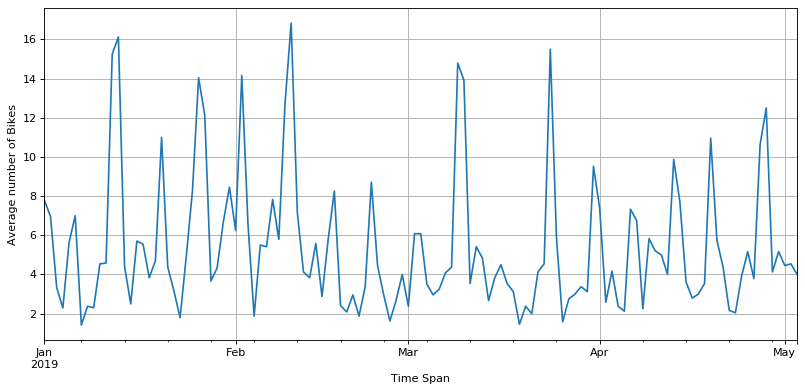

In [17]:
#Graph to verify if the data is stationary

from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
df3['AVAILABLE_BIKES'].plot()
plt.tight_layout()
plt.grid()
plt.xlabel('Time Span')
plt.ylabel('Average number of Bikes')
plt.show()
plt.show()

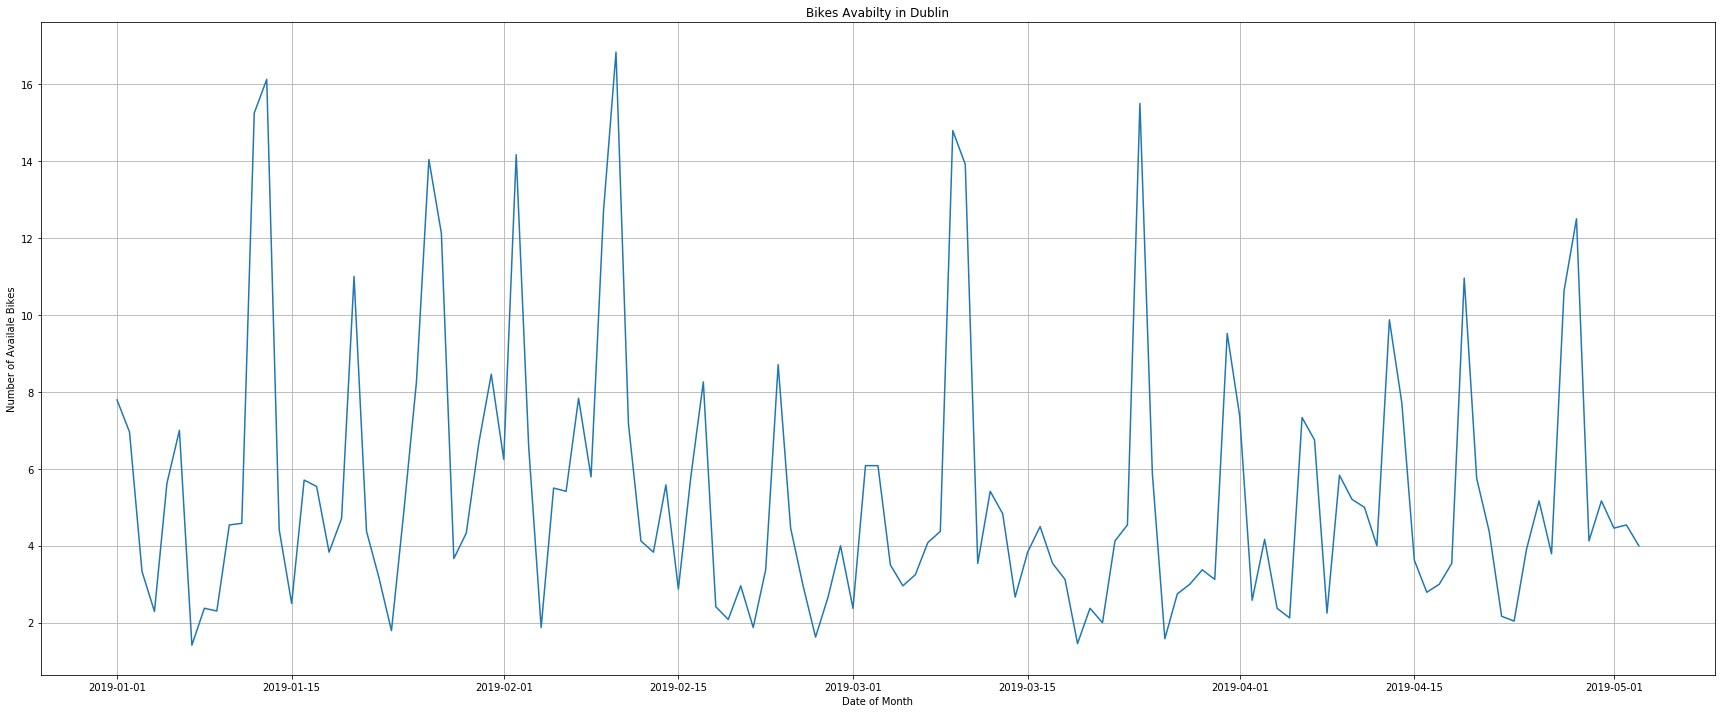

In [18]:
plt.figure(figsize=(30,12))
plt.plot(df3.AVAILABLE_BIKES)
plt.title('Bikes Avabilty in Dublin')
plt.ylabel('Number of Availale Bikes')
plt.xlabel('Date of Month')
plt.grid(True)
plt.show()

Dickey–Fuller test: p=0.391205


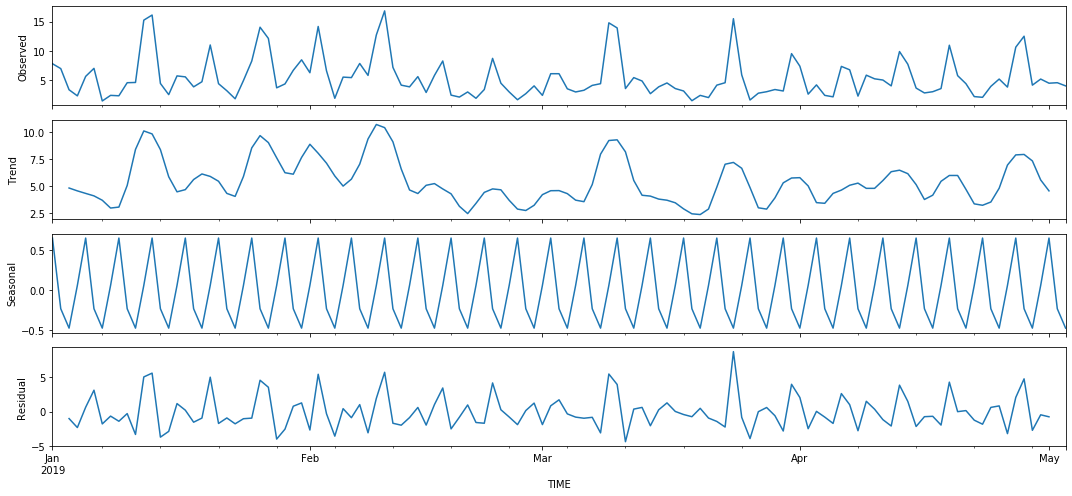

In [19]:
# Stationarity check and Seasonal decomposition
#seasonal_decompose(btc_month.close, freq=12).plot()
seasonal_decompose(df3.AVAILABLE_BIKES, freq = 4 ).plot()
print("Dickey–Fuller test: p=%f" % adfuller(df3.AVAILABLE_BIKES)[1])
plt.show()

In [20]:
# Box-Cox Transformations
df3['AVAILABLE_BIKES'], lmbda = stats.boxcox(df3.AVAILABLE_BIKES)
print("Dickey–Fuller test: p=%f" % adfuller(df3.AVAILABLE_BIKES)[1])

Dickey–Fuller test: p=0.067734


In [21]:
# Converting the data to a logarithmic scale
bc_log = pd.DataFrame(np.log(df3.AVAILABLE_BIKES))


# Differencing the log values
log_diff = bc_log.diff().dropna()

# Using the Dickey-Fuller test to check for stationarity
results = adfuller(log_diff.AVAILABLE_BIKES)
print(f"P-value: {results[1]}")

P-value: 1.576462750670624e-18


Text(0.5, 0, 'Date of Month')

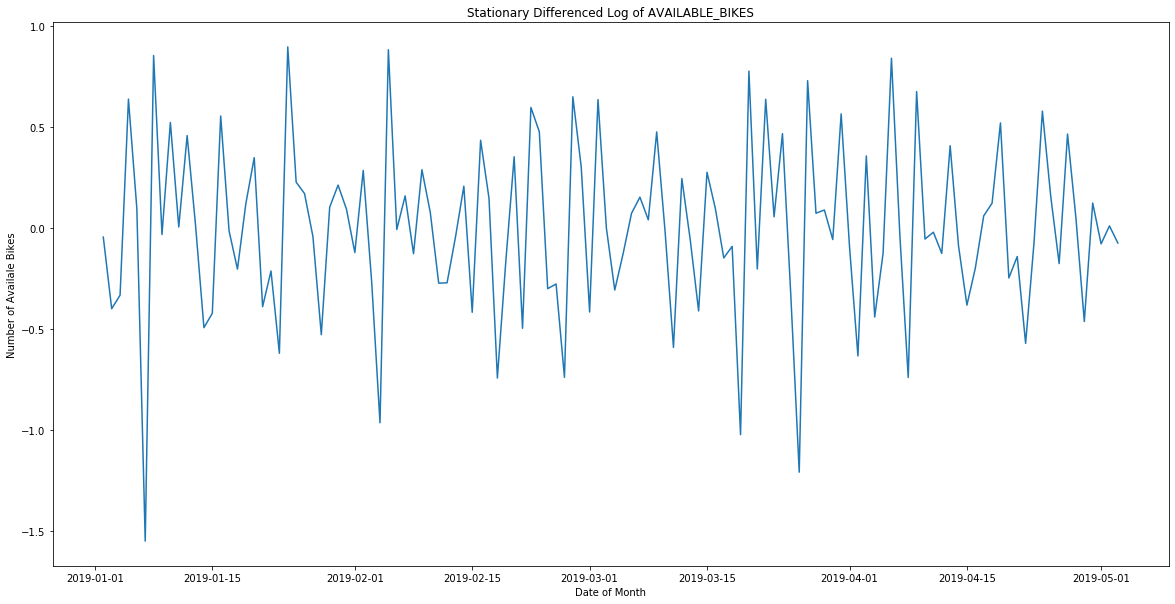

In [23]:
plt.figure(figsize=(20,10))
plt.plot(log_diff)
plt.title(label = 'Stationary Differenced Log of AVAILABLE_BIKES')
plt.ylabel('Number of Availale Bikes')
plt.xlabel('Date of Month')

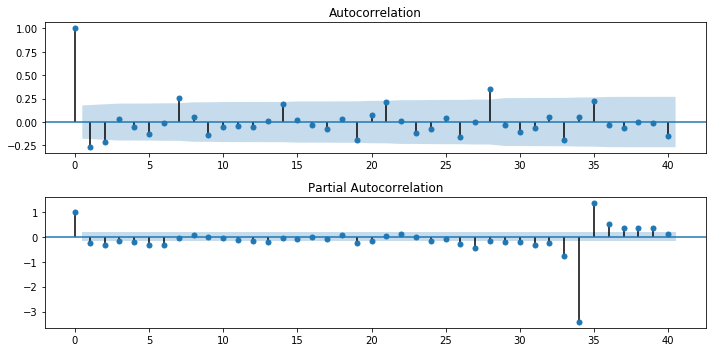

In [24]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(10,5))
ax = plt.subplot(211)
# Plot the autocorrelation function
#sm.graphics.tsa.plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_acf(log_diff.values.squeeze(), lags=40, ax=ax)
ax = plt.subplot(212)
#sm.graphics.tsa.plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plot_pacf(log_diff.values.squeeze(), lags=40, ax=ax)
plt.tight_layout()
plt.show()

In [25]:
# Initial approximation of parameters
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

#Show parameter list
print(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(df3.AVAILABLE_BIKES, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [26]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters         aic
2     (0, 2)  113.442002
5     (1, 2)  115.412020
7     (2, 1)  115.881440
8     (2, 2)  117.216543
4     (1, 1)  119.570190


In [27]:
print(best_model.summary())

                           Statespace Model Results                           
Dep. Variable:        AVAILABLE_BIKES   No. Observations:                  123
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 -53.721
Date:                Sat, 27 Jun 2020   AIC                            113.442
Time:                        10:15:40   BIC                            121.854
Sample:                    01-01-2019   HQIC                           116.859
                         - 05-03-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5259      0.660     -0.797      0.426      -1.820       0.768
ma.L2         -0.4732      0.363     -1.305      0.192      -1.184       0.238
sigma2         0.1364      0.095      1.430      0.1

Dickey–Fuller test:: p=6.000000


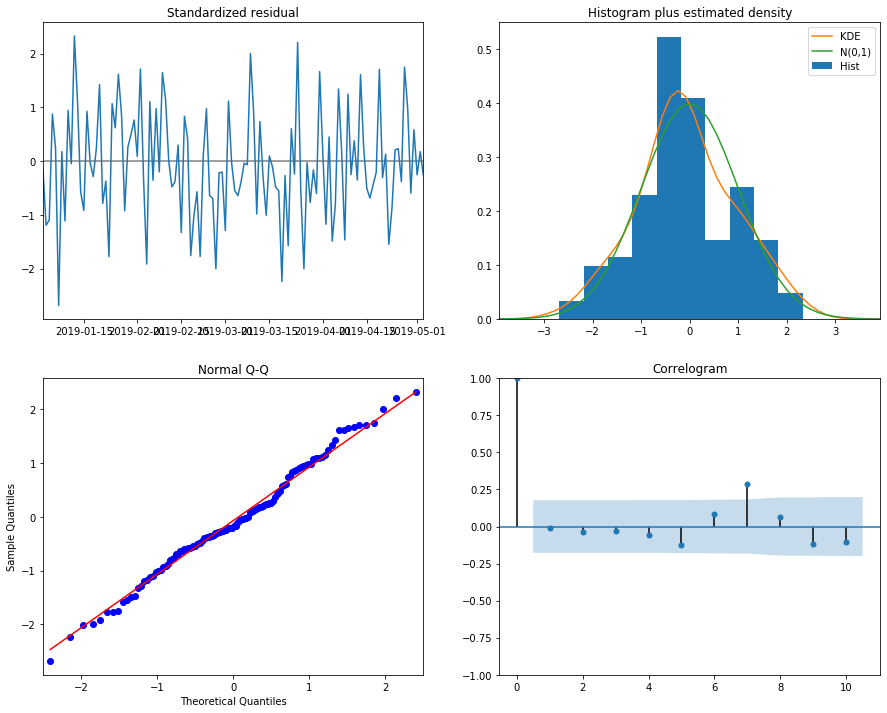

In [28]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[2])

best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [29]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

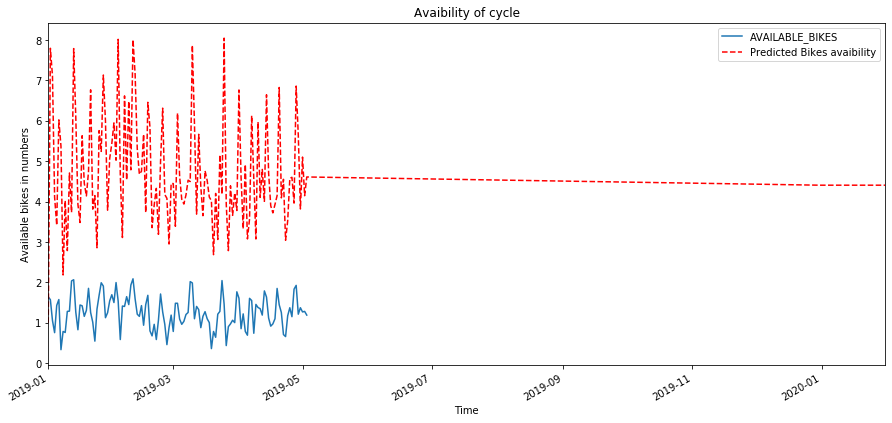

In [32]:
# Prediction
btc_month_pred = df3[['AVAILABLE_BIKES']]
#date_list = [datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31), datetime(2018, 6, 30), 
#             datetime(2018, 7, 31), datetime(2018, 8, 31), datetime(2018, 9, 30), datetime(2018, 10, 31),
#             datetime(2018, 11, 30), datetime(2018, 12, 31)]

#Index Date list for future dataframe
date_list = [datetime(2019, 12, 31), datetime(2020, 1, 31)] #, 
             #datetime(2020, 4, 30), datetime(2020, 5, 31), datetime(2020, 6, 30),datetime(2020, 7, 31), datetime(2020, 8, 31), datetime(2020, 9, 30)]
future = pd.DataFrame(index=date_list, columns= df3.columns)
btc_month_pred = pd.concat([btc_month_pred, future])

btc_month_pred['forecast'] = invboxcox(best_model.predict(start=0, end=1400), lmbda)
#btc_month_pred['forecast'] = invboxcox(best_model.predict(start=datetime(2016, 1, 31), end=datetime(2020, 3, 31)), lmbda)


plt.figure(figsize=(15,7))
btc_month_pred.AVAILABLE_BIKES.plot()
btc_month_pred.forecast.plot(color='r', ls='--', label='Predicted Bikes avaibility')
plt.legend()
plt.title('Avaibility of cycle')
plt.ylabel('Available bikes in numbers')
plt.xlabel('Time')
plt.show()

In [31]:
btc_month_pred.tail(10)

,AVAILABLE_BIKES,AVAILABLE_BIKE_STANDS,BIKE_STANDS,STATION_ID,clamt,clht,dewpt,ind,ind_1,ind_2,...,sun,temp,vappr,vis,w,wddir,wdsp,wetb,ww,forecast
2019-04-26,1.151251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.600165
2019-04-27,1.832174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.961521
2019-04-28,1.925857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.856683
2019-04-29,1.213060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.642404
2019-04-30,1.372581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.816418
2019-05-01,1.269032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.099711
2019-05-02,1.282227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.143780
2019-05-03,1.190624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.607695
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.404363
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.404363
